The goal of this notebook is to catagorize pitchers  using k-means clustering (from scratch and with Scikit-learn) to see how the winners of the year's cy young winners compare to the groups they are assigned to. 

In [217]:
# Importing libraries 
import numpy as np
import pandas as pd 
from pybaseball import pitching_stats
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from IPython.display import clear_output



In [218]:
# Importing and cleaning data 
players = pitching_stats(2022)
print(players.columns.to_list())


['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'LOB%', 'FIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'Starting', 'Start-IP', 'Relieving', 'Relief-IP', 'RAR', 'Dollars', 'tERA', 'xFIP', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'inLI', 'gmLI', 'exLI', 'Pulls', 'WPA/LI', 'Clutch', 'FB% 2', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wFB', 'wSL', 'wCT', 'wCB', 'wCH', 'wSF', 'wKN', 'wFB/C', 'wSL/C', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'wKN/C', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'HLD', 'SD', 'MD', 'ERA-', 'FIP-', 'xFIP-', 'K%', 'BB%', 'SIERA', 'RS/9', 'E-F', 'FA% (

In [219]:
features = ["ERA", 'WHIP', 'H', 'R', "HR", 'BB', 'HBP']
data = players[features].copy()

1. Scale the data
2. Initalize random centroids
3. Label each data point based on how far that data point is from each centroid (cluster assignment for each pitcher)
4. Update centroids
5. Repeat steps 3, 4 until centroids stop changing

In [220]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
data.head

<bound method NDFrame.head of           ERA       WHIP          H          R     HR         BB        HBP
22   4.879310   2.983051   6.638554   5.363636   4.96   2.263158   5.235294
12   3.922414   4.050847   2.626506   3.181818   2.44   5.894737   2.058824
0    1.000000   1.000000   1.000000   1.000000   2.44   2.263158   3.647059
4    2.370690   3.288136   7.289157   4.272727   3.88   5.578947   5.235294
24   5.137931   7.254237   8.807229   4.954545   3.52   2.105263   1.000000
5    2.500000   3.745763   1.867470   1.272727   3.16   4.631579   1.529412
6    2.887931   3.745763   5.337349   2.636364   2.44   2.736842   2.588235
11   3.922414   4.203390   7.072289   4.681818   4.60   3.368421   1.529412
17   4.077586   3.135593   4.036145   5.090909   6.40   5.736842   7.352941
10   3.767241   6.033898   6.421687   4.818182   2.08   8.263158   6.294118
2    2.163793   5.271186   2.084337   2.636364   3.88  10.000000   2.058824
14   3.974138   6.033898   7.289157   5.500000   2.08   5.

In [221]:
data.describe()


,ERA,WHIP,H,R,HR,BB,HBP
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,5.112069,5.589831,5.843373,5.112121,5.432000,5.129825,4.458824
std,2.149708,2.284856,2.398613,2.070907,2.271429,1.964031,2.164063
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.922414,3.745763,4.469880,4.000000,3.880000,3.684211,3.117647
50%,4.879310,5.728814,6.096386,4.954545,5.320000,5.263158,4.176471
75%,6.586207,6.796610,7.397590,6.181818,7.120000,6.052632,5.764706
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [222]:

# Iterate through each column in out data, then calls x.sample to select a single random value from that column and turns it into a float. 
# Next it appends these centroins into a list and when the loop is complete it it creates a dataframe out of them with each column being each centroid. 
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)





In [223]:
centroids = random_centroids(data, 5)
centroids

/var/folders/zh/rgqvb6zn45j1dm3h1gw654r00000gn/T/ipykernel_90016/834628581.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
ERA,6.767241,2.060345,9.534483,6.663793,4.077586
WHIP,6.491525,2.830508,4.050847,6.033898,2.525424
H,6.638554,1.542169,9.349398,7.289157,6.855422
R,4.272727,7.954545,10.000000,5.500000,2.636364
HR,3.520000,5.680000,7.480000,3.520000,4.600000
BB,3.526316,3.368421,4.631579,6.052632,7.631579
HBP,1.529412,3.647059,3.117647,4.176471,4.176471


In [224]:
# Label each datapoint according to the cluster centers. 
# Looks at each player (data point) and finds the eculidian distance between the player and each centroid. 
# Next it finds the cluster center that is closest to that player. 

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
    return distances.idxmin(axis=1)



In [225]:
labels = get_labels(data, centroids)
labels.value_counts()

3    20
4     9
0     6
1     5
2     5
Name: count, dtype: int64

In [226]:
# Grouping data by labels. 
# Finding the geometric mean of each cluster.
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x)).mean()).T

In [227]:
def plot_clusters(data, labels, centroids, iterations): 
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

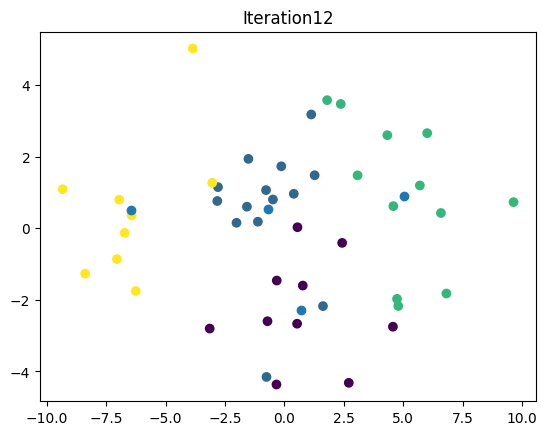

In [228]:
max_iterations = 100
centroid_count = 3
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1 

while iteration < max_iterations and not centroids.equals(old_centroids): 
    old_centroids = centroids 

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [229]:
centroids

,0,1,2,3
ERA,4.100862,5.599754,3.045259,8.232759
WHIP,6.094915,5.391041,3.008475,8.779661
H,6.389157,6.491394,2.969880,8.060241
R,4.613636,5.519481,2.840909,8.060606
HR,3.448000,6.194286,4.330000,7.920000
BB,6.794737,3.729323,4.263158,6.614035
HBP,3.805882,4.327731,4.397059,5.470588
